# Actividad de clase: SGD puro vs Momentum para optimizar una función

En esta actividad se compararán los métodos de SGD puro vs SGD con Momentum

Descripción de la función con la que se trabajará y de la dirección de la optimización

La función con la que se trabajará es $y=f(x)=-2x^{3}+x$ en el intervalo $[-1,1]$

La dirección de la optimización será la minimización de $f(x)$.

Importar las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

Declaración de x_grafico y y_grafico y gráfico de la función 

In [2]:
x_grafico = np.arange(-1, 1.05, 0.05)
x_grafico

array([-1.0000000e+00, -9.5000000e-01, -9.0000000e-01, -8.5000000e-01,
       -8.0000000e-01, -7.5000000e-01, -7.0000000e-01, -6.5000000e-01,
       -6.0000000e-01, -5.5000000e-01, -5.0000000e-01, -4.5000000e-01,
       -4.0000000e-01, -3.5000000e-01, -3.0000000e-01, -2.5000000e-01,
       -2.0000000e-01, -1.5000000e-01, -1.0000000e-01, -5.0000000e-02,
        8.8817842e-16,  5.0000000e-02,  1.0000000e-01,  1.5000000e-01,
        2.0000000e-01,  2.5000000e-01,  3.0000000e-01,  3.5000000e-01,
        4.0000000e-01,  4.5000000e-01,  5.0000000e-01,  5.5000000e-01,
        6.0000000e-01,  6.5000000e-01,  7.0000000e-01,  7.5000000e-01,
        8.0000000e-01,  8.5000000e-01,  9.0000000e-01,  9.5000000e-01,
        1.0000000e+00])

In [3]:
y_grafico = -2 * x_grafico**3 + x_grafico
y_grafico

array([ 1.0000000e+00,  7.6475000e-01,  5.5800000e-01,  3.7825000e-01,
        2.2400000e-01,  9.3750000e-02, -1.4000000e-02, -1.0075000e-01,
       -1.6800000e-01, -2.1725000e-01, -2.5000000e-01, -2.6775000e-01,
       -2.7200000e-01, -2.6425000e-01, -2.4600000e-01, -2.1875000e-01,
       -1.8400000e-01, -1.4325000e-01, -9.8000000e-02, -4.9750000e-02,
        8.8817842e-16,  4.9750000e-02,  9.8000000e-02,  1.4325000e-01,
        1.8400000e-01,  2.1875000e-01,  2.4600000e-01,  2.6425000e-01,
        2.7200000e-01,  2.6775000e-01,  2.5000000e-01,  2.1725000e-01,
        1.6800000e-01,  1.0075000e-01,  1.4000000e-02, -9.3750000e-02,
       -2.2400000e-01, -3.7825000e-01, -5.5800000e-01, -7.6475000e-01,
       -1.0000000e+00])

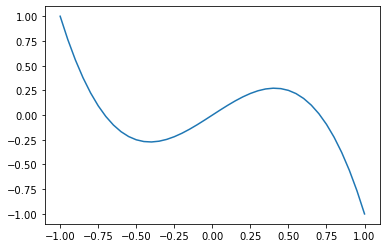

In [4]:
plt.plot(x_grafico,y_grafico)
#Hacer explícito que se muestra el gráfico
plt.show()

Declaración de la solución semila, del tamaño de paso y de la cantidad de iteraciones

Sea $x0=-1$, sea $\Delta=0.01$, y sea $n=20$.

In [5]:
x0 = -1

In [7]:
delta = 0.01

In [8]:
n = 20

Definición de funciones que calculan $f(x)$ y el gradiente de $f(x)$ para cualquier punto $x$.

La derivada de $f(x)$ es $f'(x)=-6x^2+1$

In [9]:
def f(x):
    return -2 * x**3 + x

def gradf(x):
    return -6 * x**2 + 1 

Implementación del SGD puro

In [10]:
#Vector vacío para almacenar los valores conseguidos de x
solucion_SGD=[]
#Append el valor inicial
solucion_SGD.append(x0)
#Asignar x como x0
x=x0
#Ciclo iterativo
for i in range(0,n):
    #Calcular el gradiente de f en x
    grad=gradf(x)
    #Actualización de x
    x = x - delta*grad
    #Añadir el x resultante en el vector solucion_SGD
    solucion_SGD.append(x)

Implementación del SGD con Momentum

Declaración del parámetro $\beta$

In [11]:
beta = 0.7

In [12]:
#Vector vacío para almacenar los valores conseguidos de x
solucion_momentum = []
#Append el valor inicial
solucion_momentum.append(x0)
#Asignar x como x0
x = x0
#Asignar el gradiente anterior como 0
grad_anterior = 0
#Ciclo iterativo
for i in range(0,n):
    #Calcular el gradiente actual de f en x
    grad_actual = gradf(x)
    #Sumar el gardiente actual con el gradiente anterior, ponderado con el parámetro beta
    paso = grad_actual + beta * grad_anterior
    #Actualizar el gradiente anterior, para ser utilizado en la siguiente iteracion
    x = x - delta * paso
    #Actualización de x
    solucion_momentum.append(x)
    #Añadir el x resultante en el vector solucion_SGD
    grad_anterior = grad_actual

Graficar la evolución de x para SGD puro y para Momentum

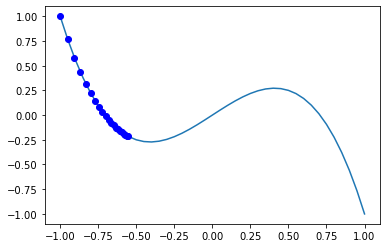

In [14]:
#Calcular los y asociados a cada x_SGD
y_SGD = [f(x) for x in solucion_SGD]
#Gráfico
plt.plot(x_grafico, y_grafico)
plt.plot(solucion_SGD, y_SGD, 'o', color='blue')
#Hacer explícito que se muestra el gráfico
plt.show()

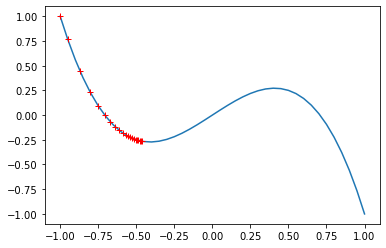

In [15]:
#Calcular los y asociados a cada x_momentum
y_momentum = [f(x) for x in solucion_momentum]
#Gráfico
plt.plot(x_grafico, y_grafico)
plt.plot(solucion_momentum, y_momentum, '+', color='red')
#Hacer explícito que se muestra el gráfico
plt.show()